In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/data/submission.csv')

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
drop_column = ['Name', 'Ticket', 'PassengerId']
for col in drop_column:
    train.drop(col, axis=1, inplace=True)
    test.drop(col, axis=1, inplace=True)


In [ ]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [ ]:
column_list = train.columns

In [ ]:
for col in column_list:
    print(train[col].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


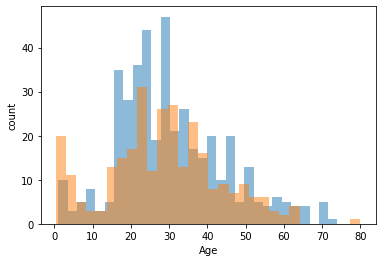

In [ ]:
plt.hist(train.loc[train['Survived'] == 0, 'Age'].dropna(), bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Survived'] == 1, 'Age'].dropna(), bins=30, alpha=0.5, label='1')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

<function matplotlib.pyplot.show>

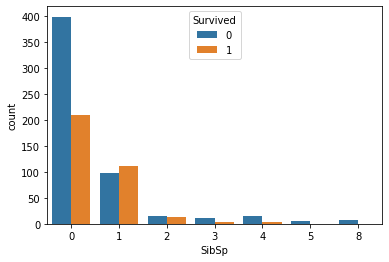

In [ ]:
sns.countplot(x='SibSp',hue='Survived', data=train) 
plt.show
#hue를 써줘야 sibsp에서 survived에 따른 그래프가 나옴.

<function matplotlib.pyplot.show>

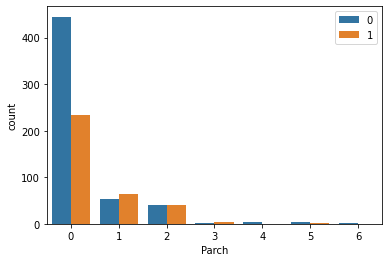

In [ ]:
sns.countplot(x='Parch', hue='Survived', data=train)
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show>

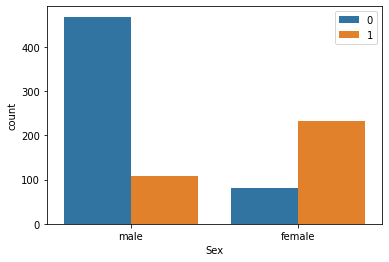

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.legend(loc='upper right')
plt.show

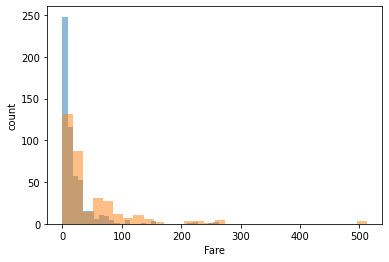

In [ ]:
plt.hist(train.loc[train['Survived'] == 0, 'Fare'].dropna(), bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Survived'] == 1, 'Fare'].dropna(), bins=30, alpha=0.5, label='1')
plt.xlabel('Fare')
plt.ylabel('count')
plt.show()

<function matplotlib.pyplot.show>

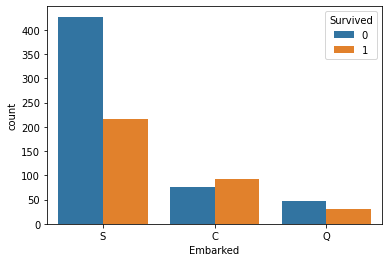

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.show

성별 -> 여자일수록 생존률 올라감.
운임 -> 높을수록 생존률 올라감.
동승자 -> 많을수록 생존률 올라감/

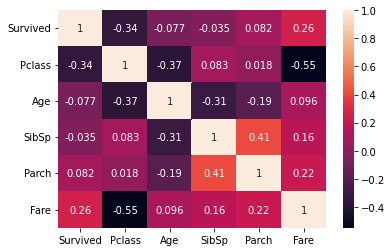

In [ ]:
sns.heatmap(train.corr(), annot=True)

In [ ]:
data = pd.concat([train, test], sort=False)

In [ ]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)

In [ ]:
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)

In [ ]:
data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [ ]:
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

<function matplotlib.pyplot.show>

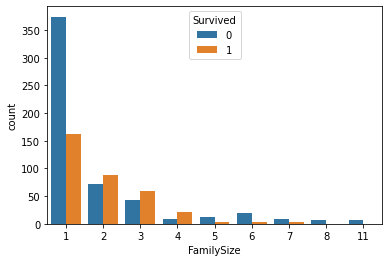

In [ ]:
data['FamilySize'] = data['Parch'] + data['SibSp']+1
train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][len(train):]
sns.countplot(x='FamilySize', data=train, hue='Survived')
plt.show

In [ ]:
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
train['IsAlone'] = data['IsAlone'][:len(train)]
test['IsAlone'] = data['IsAlone'][len(train):]

In [ ]:
drop_column = ['Parch', 'SibSp']
data.drop(drop_column, axis=1, inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0.0,3,0,22.0,7.2500,0,2,0
1,1.0,1,1,38.0,71.2833,1,2,0
2,1.0,3,1,26.0,7.9250,0,1,1
3,1.0,1,1,35.0,53.1000,0,2,0
4,0.0,3,0,35.0,8.0500,0,1,1


In [ ]:
train = data[:len(train)]
test = data[len(train):]

In [ ]:
y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
rpsub = pd.read_csv('/content/drive/MyDrive/data/submission.csv')
rpsub['Survived'] = list(map(int, y_pred))
rpsub.to_csv('rpsub.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)

In [ ]:
categorical_features =['Embarked', 'Pclass', 'Sex'] 
#범주형 변수들을 무시해주기 위해 사용.

In [ ]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)

params = {'objective':'binary'}

model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval], verbose_eval=10, num_boost_round=1000, early_stopping_rounds=10)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.423733	valid_1's binary_logloss: 0.478405
[20]	training's binary_logloss: 0.349638	valid_1's binary_logloss: 0.443265
[30]	training's binary_logloss: 0.306276	valid_1's binary_logloss: 0.4325
[40]	training's binary_logloss: 0.272869	valid_1's binary_logloss: 0.437579
Early stopping, best iteration is:
[31]	training's binary_logloss: 0.30244	valid_1's binary_logloss: 0.43101


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/data/submission.csv')
sub['Survived'] = list(map(int, y_pred))
sub.to_csv('sub.csv', index=False)

In [ ]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
lox_train = train[['Pclass', 'Age']]
loy_train = train['Survived']
lox_test = test[['Pclass','Age']]

In [ ]:
model.fit(lox_train, loy_train)

LogisticRegression()

In [ ]:
loy_pred = model.predict(lox_test)

In [ ]:
losub = pd.read_csv('/content/drive/MyDrive/data/submission.csv')
losub['Survived'] = list(map(int, y_pred))
losub.to_csv('losub.csv', index=False)